# Bias-Variance Trade-Off
You should build a machine learning pipeline to examine the effect of regularization on the bias-variance trade-off. In particular, you should do the following:
- Load the `mnist` dataset using [Pandas](https://pandas.pydata.org/docs/reference/api/pandas.read_csv.html). You can find this dataset in the datasets folder.
- Split the dataset into training and test sets using [Scikit-Learn](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html).
- Conduct data exploration, data preprocessing, and feature engineering if necessary.
- Choose a model that is vulnerable to overfitting, such as [decision trees](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html).
- Choose a regularization hyperparameter of that model, such as the [max_depth](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html) of decision trees.
- Define a range for the regularization hyperparameter and repeat the following experiment:
    - Change the value of the regularization hyperparameter within its range.
    - Train your model with the current value of the regularization hyperparameter on your training set.
    - Test your trained model on the test set.
    - Save the train and test errors in different columns of a [data frame](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.html).
- Draw a line chart to show how train and test errors of your model will change when the regularization hyperparameter increases. You can use [Plotly](https://plotly.com/python/line-charts/) for visualization.
- Analyze the chart and explain the role of the regularization hyperparameter on the bias-variance trade-off.
- Check the documentation of different machine learning models to identify their most important regularization hyperparameters.

In [30]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

In [4]:
df = pd.read_csv("https://raw.githubusercontent.com/Sodabeh-Taherpanah/ML-examples/refs/heads/main/datasets/mnist.csv")
print(df.head())

      id  class  pixel1  pixel2  pixel3  pixel4  pixel5  pixel6  pixel7  \
0  31953      5       0       0       0       0       0       0       0   
1  34452      8       0       0       0       0       0       0       0   
2  60897      5       0       0       0       0       0       0       0   
3  36953      0       0       0       0       0       0       0       0   
4   1981      3       0       0       0       0       0       0       0   

   pixel8  ...  pixel775  pixel776  pixel777  pixel778  pixel779  pixel780  \
0       0  ...         0         0         0         0         0         0   
1       0  ...         0         0         0         0         0         0   
2       0  ...         0         0         0         0         0         0   
3       0  ...         0         0         0         0         0         0   
4       0  ...         0         0         0         0         0         0   

   pixel781  pixel782  pixel783  pixel784  
0         0         0         0     

In [5]:
X = df.drop(columns=["class"])
y = df["class"]  # digits 0-9
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

 --> A shallow tree (**small max depth**) may not capture enough complexity (underfitting, high bias).

  -->A deep tree (**large max depth**) might overfit the data (overfitting, high variance).


I want to check how the tree’s complexity (depth) affects the model's performance.


In [19]:
max_depths = range(1, 21)  # hyperparameter->  get 1 to 20
train_errors = []
test_errors = []

In [20]:

for depth in max_depths:
    model = DecisionTreeClassifier(max_depth=depth, random_state=42)
    model.fit(X_train, y_train)


    trainAcc = accuracy_score(y_train, model.predict(X_train))
    testAcc = accuracy_score(y_test, model.predict(X_test))

    train_errors.append(1 - trainAcc)  # We know errors are opposite of accuracy
    test_errors.append(1 - testAcc)
    print(f"Max Depth: {depth}, Train Error: {1 - trainAcc}, Test Error: {1 - testAcc}")


print(f"Length of max_depths: {len(max_depths)}")
print(f"Length of train_errors: {len(train_errors)}")
print(f"Length of test_errors: {len(test_errors)}")

Max Depth: 1, Train Error: 0.785625, Test Error: 0.8049999999999999
Max Depth: 2, Train Error: 0.6403125000000001, Test Error: 0.65625
Max Depth: 3, Train Error: 0.48406249999999995, Test Error: 0.5075000000000001
Max Depth: 4, Train Error: 0.385, Test Error: 0.41500000000000004
Max Depth: 5, Train Error: 0.28531249999999997, Test Error: 0.3275
Max Depth: 6, Train Error: 0.19999999999999996, Test Error: 0.27625
Max Depth: 7, Train Error: 0.13718750000000002, Test Error: 0.27
Max Depth: 8, Train Error: 0.08468750000000003, Test Error: 0.24750000000000005
Max Depth: 9, Train Error: 0.04625000000000001, Test Error: 0.24624999999999997
Max Depth: 10, Train Error: 0.024375000000000036, Test Error: 0.25375000000000003
Max Depth: 11, Train Error: 0.012187500000000018, Test Error: 0.24624999999999997
Max Depth: 12, Train Error: 0.006562500000000027, Test Error: 0.25125
Max Depth: 13, Train Error: 0.0034374999999999822, Test Error: 0.24124999999999996
Max Depth: 14, Train Error: 0.0006249999999

Low max_depth (underfitting): High train and test errors (high bias).
High max_depth (overfitting): Low train error but high test error (high variance).
The ideal range is somewhere in between, where the test error is minimized.

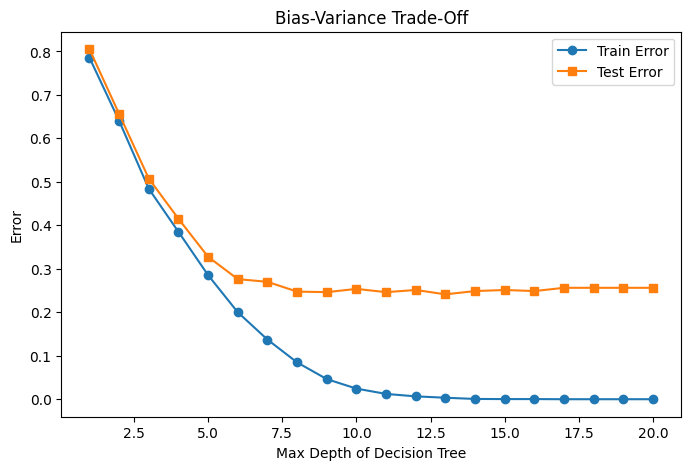

In [21]:
plt.figure(figsize=(8, 5))
plt.plot(max_depths, train_errors, label="Train Error", marker="o")
plt.plot(max_depths, test_errors, label="Test Error", marker="s")
plt.xlabel("Max Depth of Decision Tree")
plt.ylabel("Error")
plt.legend()
plt.title("Bias-Variance Trade-Off")
plt.show()

Bias-Variance Trade-Off:

->. Low max_depth (1-3): The model is underfitting, resulting in higher errors for both train and test sets.
   
-> Medium max_depth (4-9): The model starts to generalize better, with lower errors on both sets.

-> High max_depth (10-20): The model begins to overfit the training data. The train error is very low, but the test error increases as the model becomes more complex and starts to fit noise in the data.

In [23]:
error_df = pd.DataFrame({
    'Max Depth': max_depths,
    'Train Error': train_errors,
    'Test Error': test_errors
})

print(f"error_df: {error_df}")

error_df:     Max Depth  Train Error  Test Error
0           1     0.785625     0.80500
1           2     0.640313     0.65625
2           3     0.484062     0.50750
3           4     0.385000     0.41500
4           5     0.285312     0.32750
5           6     0.200000     0.27625
6           7     0.137188     0.27000
7           8     0.084688     0.24750
8           9     0.046250     0.24625
9          10     0.024375     0.25375
10         11     0.012188     0.24625
11         12     0.006563     0.25125
12         13     0.003437     0.24125
13         14     0.000625     0.24875
14         15     0.000313     0.25125
15         16     0.000313     0.24875
16         17     0.000000     0.25625
17         18     0.000000     0.25625
18         19     0.000000     0.25625
19         20     0.000000     0.25625


#Tuning other hyperparameters


 The combination of max_depth, min_samples_split, and min_samples_leaf provides to control
 **the bias-variance trade-off**

In [24]:
#Tuning other hyperparameters : min_samples_split & min_samples_leaf


min_samples_splits = [2, 5, 10, 20]
min_samples_leaves = [1, 2, 5, 10]


train_errors = []
test_errors = []

In [25]:

for max_depth in max_depths:
    for min_samples_split in min_samples_splits:
        for min_samples_leaf in min_samples_leaves:
            model = DecisionTreeClassifier(max_depth=max_depth,
                                           min_samples_split=min_samples_split,
                                           min_samples_leaf=min_samples_leaf,
                                           random_state=42)
            model.fit(X_train, y_train)

            #  accuracy
            train_acc = accuracy_score(y_train, model.predict(X_train))
            test_acc = accuracy_score(y_test, model.predict(X_test))


            train_errors.append(1 - train_acc)
            test_errors.append(1 - test_acc)


            print(f"max_depth: {max_depth}, min_samples_split: {min_samples_split}, "
                  f"min_samples_leaf: {min_samples_leaf}, Train Error: {1 - train_acc}, Test Error: {1 - test_acc}")



max_depth: 1, min_samples_split: 2, min_samples_leaf: 1, Train Error: 0.785625, Test Error: 0.8049999999999999
max_depth: 1, min_samples_split: 2, min_samples_leaf: 2, Train Error: 0.785625, Test Error: 0.8049999999999999
max_depth: 1, min_samples_split: 2, min_samples_leaf: 5, Train Error: 0.785625, Test Error: 0.8049999999999999
max_depth: 1, min_samples_split: 2, min_samples_leaf: 10, Train Error: 0.785625, Test Error: 0.8049999999999999
max_depth: 1, min_samples_split: 5, min_samples_leaf: 1, Train Error: 0.785625, Test Error: 0.8049999999999999
max_depth: 1, min_samples_split: 5, min_samples_leaf: 2, Train Error: 0.785625, Test Error: 0.8049999999999999
max_depth: 1, min_samples_split: 5, min_samples_leaf: 5, Train Error: 0.785625, Test Error: 0.8049999999999999
max_depth: 1, min_samples_split: 5, min_samples_leaf: 10, Train Error: 0.785625, Test Error: 0.8049999999999999
max_depth: 1, min_samples_split: 10, min_samples_leaf: 1, Train Error: 0.785625, Test Error: 0.804999999999999

 As split and leaf increase:

*   the model will be -> less complex, -> reduce overfitting.
*   the train error might rise slightly
*   the test error should decrease if overfitting is reduced.


In [26]:
error_df = pd.DataFrame({
    'Max Depth': np.tile(max_depths, len(min_samples_splits) * len(min_samples_leaves)),
    'Min Samples Split': np.repeat(min_samples_splits, len(min_samples_leaves) * len(max_depths)),
    'Min Samples Leaf': np.tile(min_samples_leaves, len(min_samples_splits) * len(max_depths)),
    'Train Error': train_errors,
    'Test Error': test_errors
})
print(error_df)

     Max Depth  Min Samples Split  Min Samples Leaf  Train Error  Test Error
0            1                  2                 1     0.785625     0.80500
1            2                  2                 2     0.785625     0.80500
2            3                  2                 5     0.785625     0.80500
3            4                  2                10     0.785625     0.80500
4            5                  2                 1     0.785625     0.80500
..         ...                ...               ...          ...         ...
315         16                 20                10     0.155000     0.26125
316         17                 20                 1     0.113750     0.26000
317         18                 20                 2     0.123437     0.26625
318         19                 20                 5     0.130000     0.25750
319         20                 20                10     0.155000     0.26125

[320 rows x 5 columns]


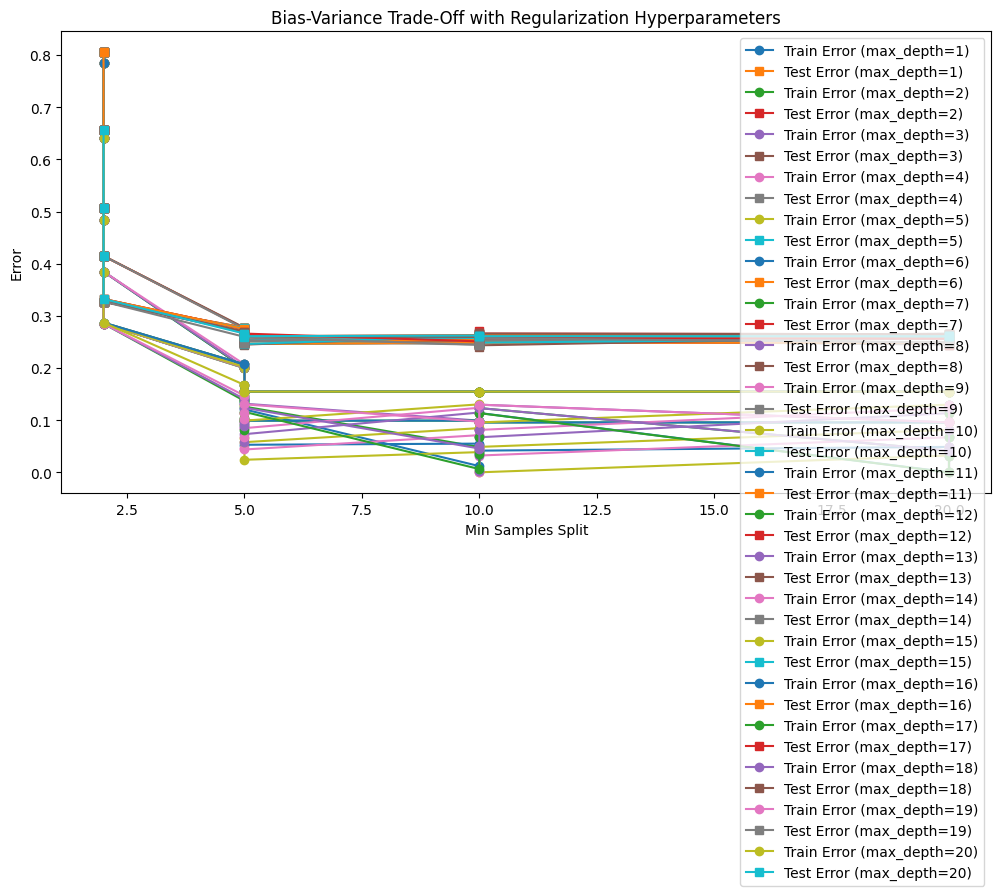

In [27]:
plt.figure(figsize=(12, 6))
for i, max_depth in enumerate(max_depths):
    subset = error_df[error_df['Max Depth'] == max_depth]
    plt.plot(subset['Min Samples Split'], subset['Train Error'], label=f"Train Error (max_depth={max_depth})", marker='o')
    plt.plot(subset['Min Samples Split'], subset['Test Error'], label=f"Test Error (max_depth={max_depth})", marker='s')

plt.xlabel('Min Samples Split')
plt.ylabel('Error')
plt.title('Bias-Variance Trade-Off with Regularization Hyperparameters')
plt.legend()
plt.show()

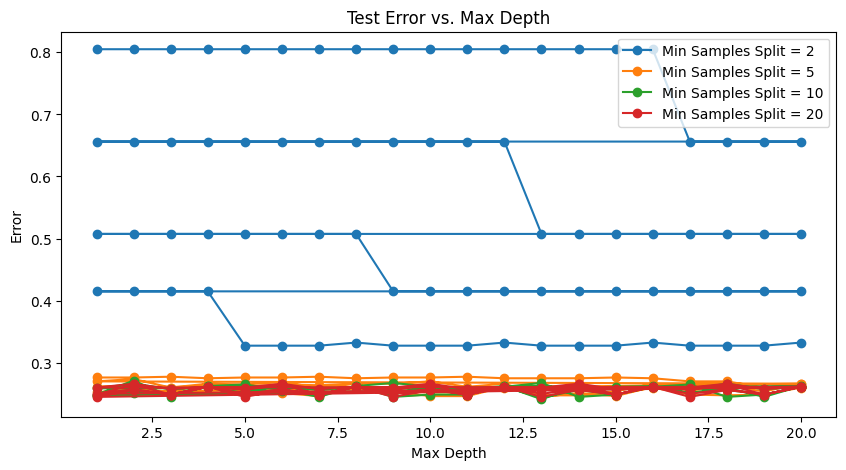

In [28]:
plt.figure(figsize=(10, 5))
for split in error_df['Min Samples Split'].unique():
    subset = error_df[error_df['Min Samples Split'] == split]
    plt.plot(subset['Max Depth'], subset['Test Error'], label=f"Min Samples Split = {split}", marker='o')

plt.xlabel("Max Depth")
plt.ylabel("Error")
plt.title("Test Error vs. Max Depth")
plt.legend()
plt.show()

**the best parameters** : where test error is minimized while keeping train error reasonable.

When max_depth is small (1–5):

    Tr Err: High (~0.785625)
    Te Err: High (~0.80500)
    Underfitting

When max_depth increases (6–15):

    TR Err: Decreases (model learns better)
    Te Err: Decreases first, then stabilizes
    Optimal Zone: This is where the model is balancing bias and variance.

When max_depth is too high (16–20):

    Tr Er: Very Low (~0.000313 or 0.000000)
    Te Er: Remains around 0.25625
    Overfitting: The model memorizes training data but does not generalize well to new data.

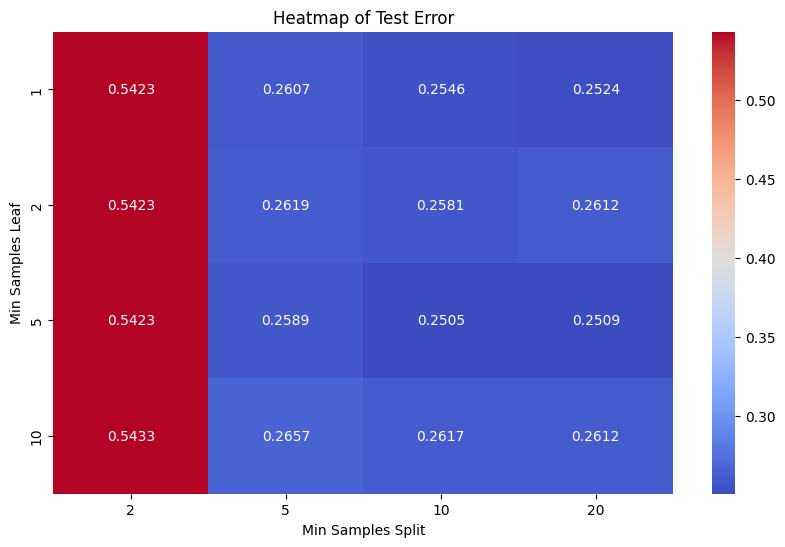

In [31]:
#  Test Error
pivot_table = error_df.pivot_table(index='Min Samples Leaf', columns='Min Samples Split', values='Test Error')
plt.figure(figsize=(10, 6))
sns.heatmap(pivot_table, annot=True, cmap="coolwarm", fmt=".4f")
plt.xlabel("Min Samples Split")
plt.ylabel("Min Samples Leaf")
plt.title("Heatmap of Test Error")
plt.show()

Best max_depth Choice
max_depth = 10 to 15 , because:
Tr Err is low (model learns well).
Te Err is also low and stable (model generalizes well).
 Higher max_depth (16+) overfits (train error is near zero but test error does not improve).

Try max_depth = 10 to 15 in a final model.

## `**Tuning  min_samples_split and min_samples_leaf to see if test error improves further.**::`
